In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style

from sklearn.linear_model import LinearRegression, ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.kernel_ridge import KernelRidge
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import matplotlib.style as style
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from math import sqrt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')        
        
# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
print (f"Training Set has {train_df.shape[0]} rows and {train_df.shape[1]} columns")

Training Set has 1460 rows and 81 columns


In [3]:
#train_df.describe()

In [4]:
#train_df.info()

In [5]:
#train_df.get_dtype_counts()

In [6]:
test_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
print (f"Test Set has {test_df.shape[0]} rows and {test_df.shape[1]} columns")

Test Set has 1459 rows and 80 columns


In [7]:
yearMin = train_df['YrSold'].min()
train_df['MonthsSinceMin'] = train_df['MoSold'] + ((train_df['YrSold'] - yearMin)*12)
test_df['MonthsSinceMin'] = test_df['MoSold'] + ((test_df['YrSold'] - yearMin)*12)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MonthsSinceMin
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,26
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,17
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,33
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,36


In [8]:
def plotting_3_chart(df, feature):
    style.use('fivethirtyeight') 

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
def plotting_4_chart(df, price, f0, f1, f2, f3):
    style.use('fivethirtyeight') 

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(15,25))
    ## creating a grid of 4 cols and 4 rows. 
    grid = gridspec.GridSpec(ncols=1, nrows=4, figure=fig)

    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Price Vs ' + f0)
    sns.scatterplot(y = df.loc[:,price], x = df.loc[:,f0]);
    
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('Price Vs ' + f1)
    sns.scatterplot(y = df.loc[:,price], x = df.loc[:,f1]);
    
    ax3 = fig.add_subplot(grid[2, :2])
    ## Set the title. 
    ax3.set_title('Price Vs ' + f2)
    sns.scatterplot(y = df.loc[:,price], x = df.loc[:,f2]);
    
    ax4 = fig.add_subplot(grid[3, :2])
    ## Set the title. 
    ax4.set_title('Price Vs ' + f3)
    sns.scatterplot(y = df.loc[:,price], x = df.loc[:,f3]);
    
def customized_scatterplot(y, x):
    style.use('fivethirtyeight')
    plt.subplots(figsize = (15,10))
    sns.scatterplot(y = y, x = x);

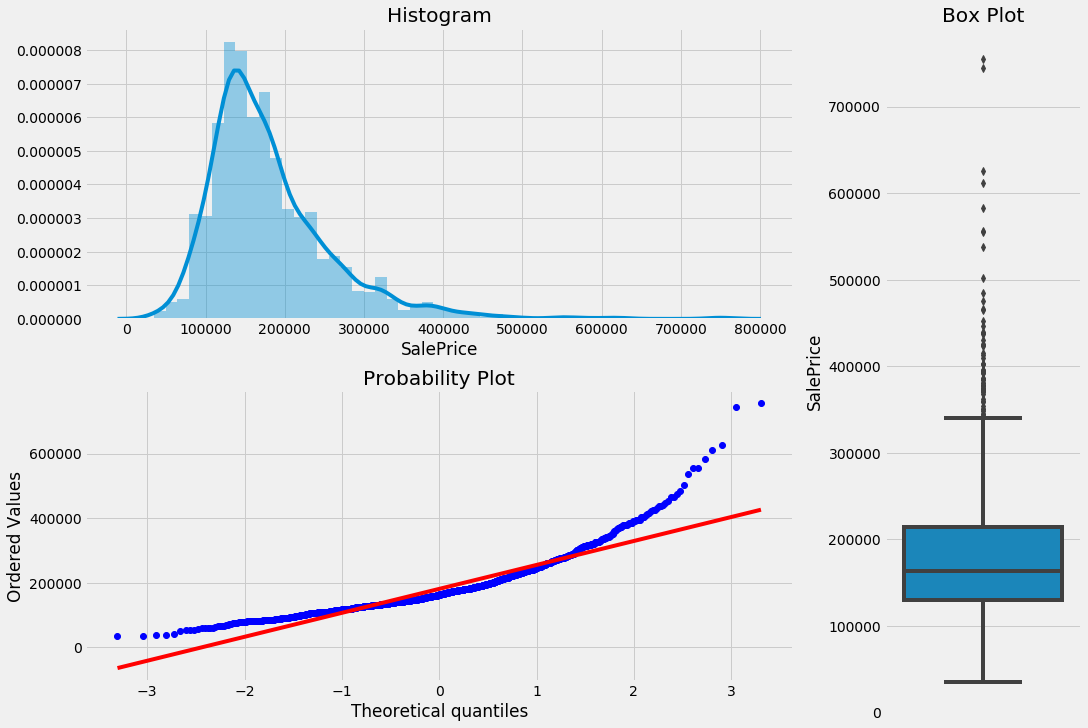

In [9]:
plotting_3_chart(train_df, 'SalePrice')

In [10]:
#skewness
print("Skewness: " + str(train_df['SalePrice'].skew()))
#kurtosis
print("Kurtosis: " + str(train_df['SalePrice'].kurt()))

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


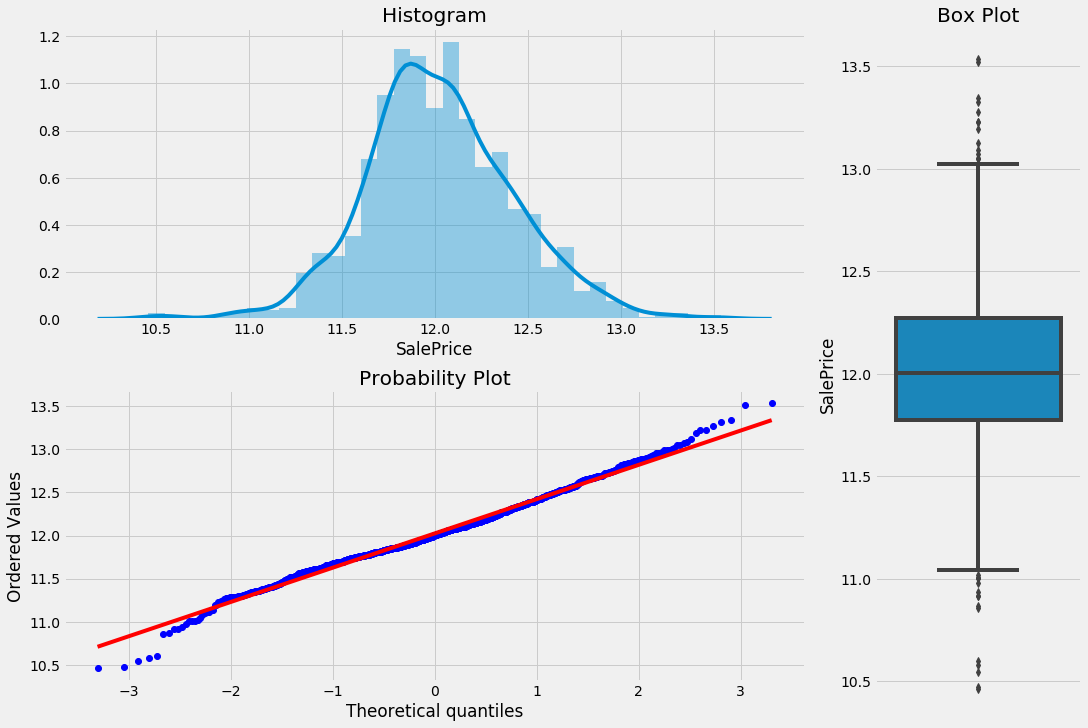

In [11]:
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])
plotting_3_chart(train_df, 'SalePrice')

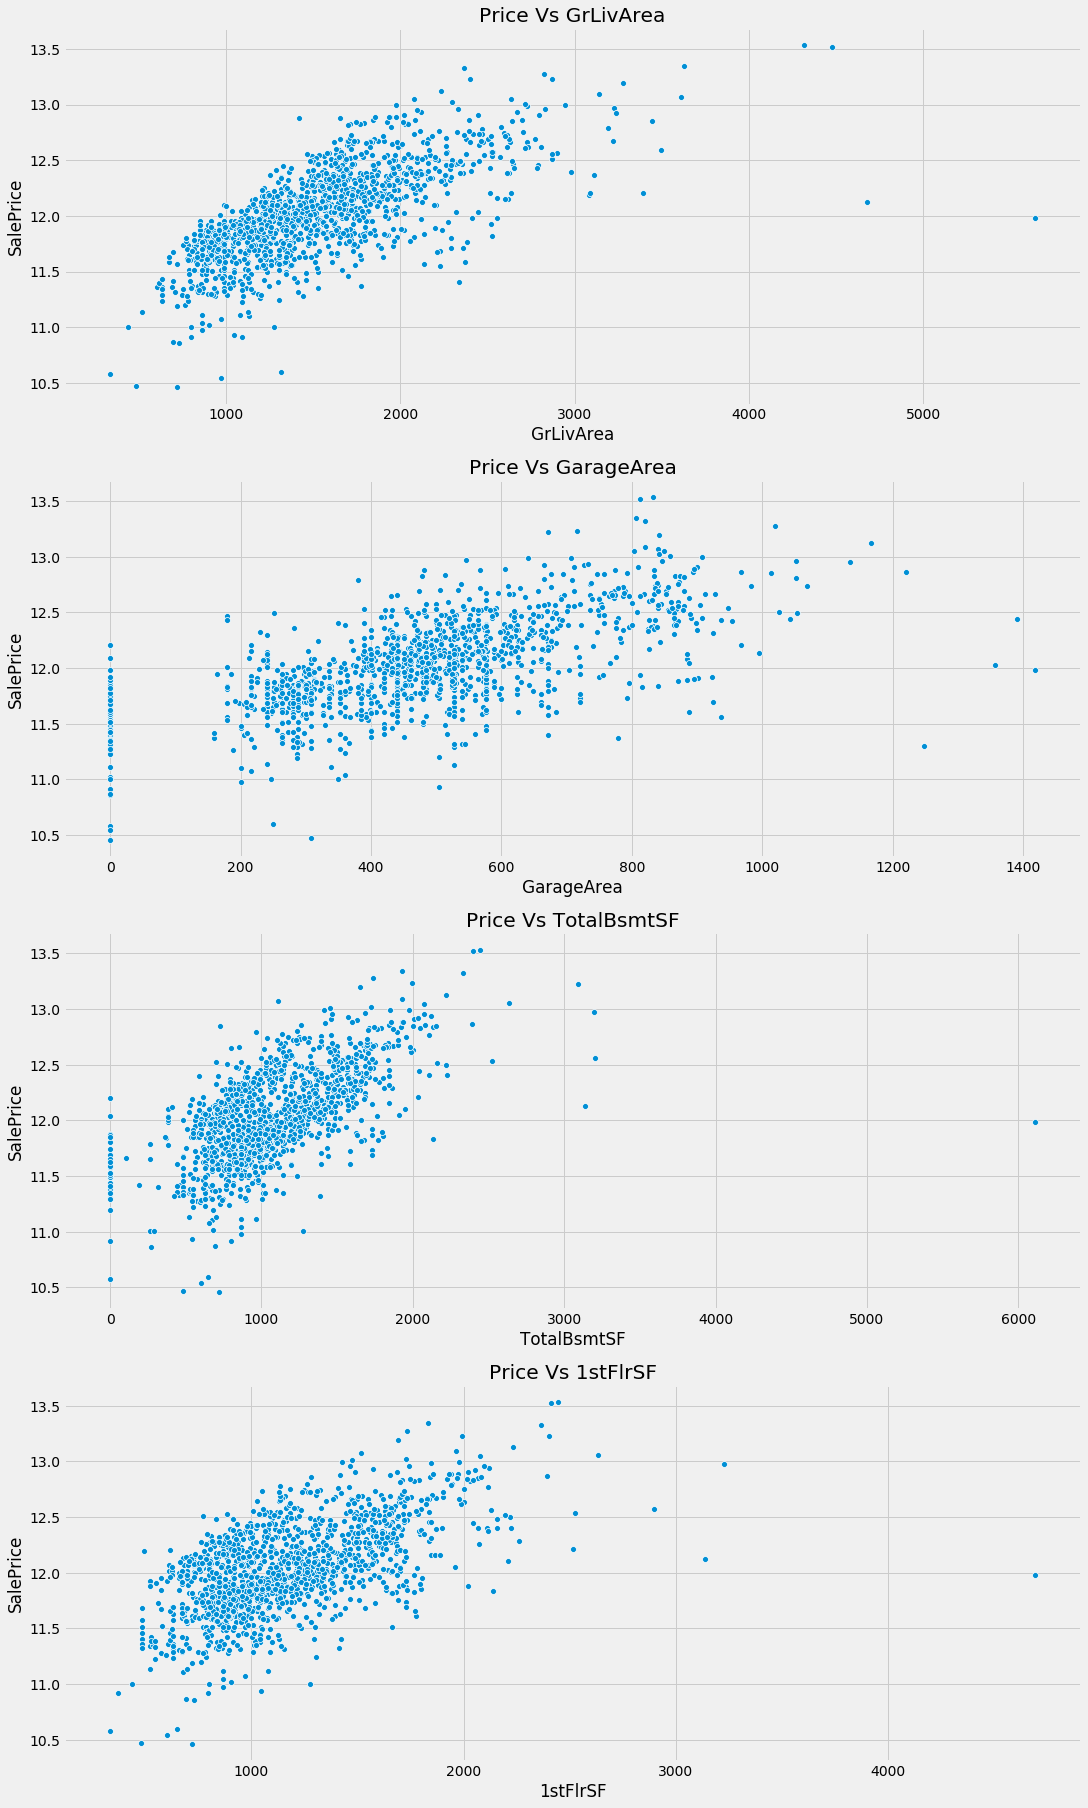

In [12]:
plotting_4_chart(train_df, 'SalePrice', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF')

In [13]:
# Outliers in GrLivArea
train_df = train_df.drop(train_df[(train_df['GrLivArea'] > 4500) & (train_df['SalePrice'] < 12.5)].index)
# Outliers in GarageArea
train_df = train_df.drop(train_df[(train_df['GarageArea'] > 1200) & (train_df['SalePrice'] < 12.5)].index)
# Outliers in TotalBsmtSF
train_df = train_df.drop(train_df[(train_df['TotalBsmtSF'] > 5000) & (train_df['SalePrice'] < 12.5)].index)
# Outliers in 1stFlrSF
train_df = train_df.drop(train_df[(train_df['1stFlrSF'] > 4000) & (train_df['SalePrice'] < 12.5)].index)

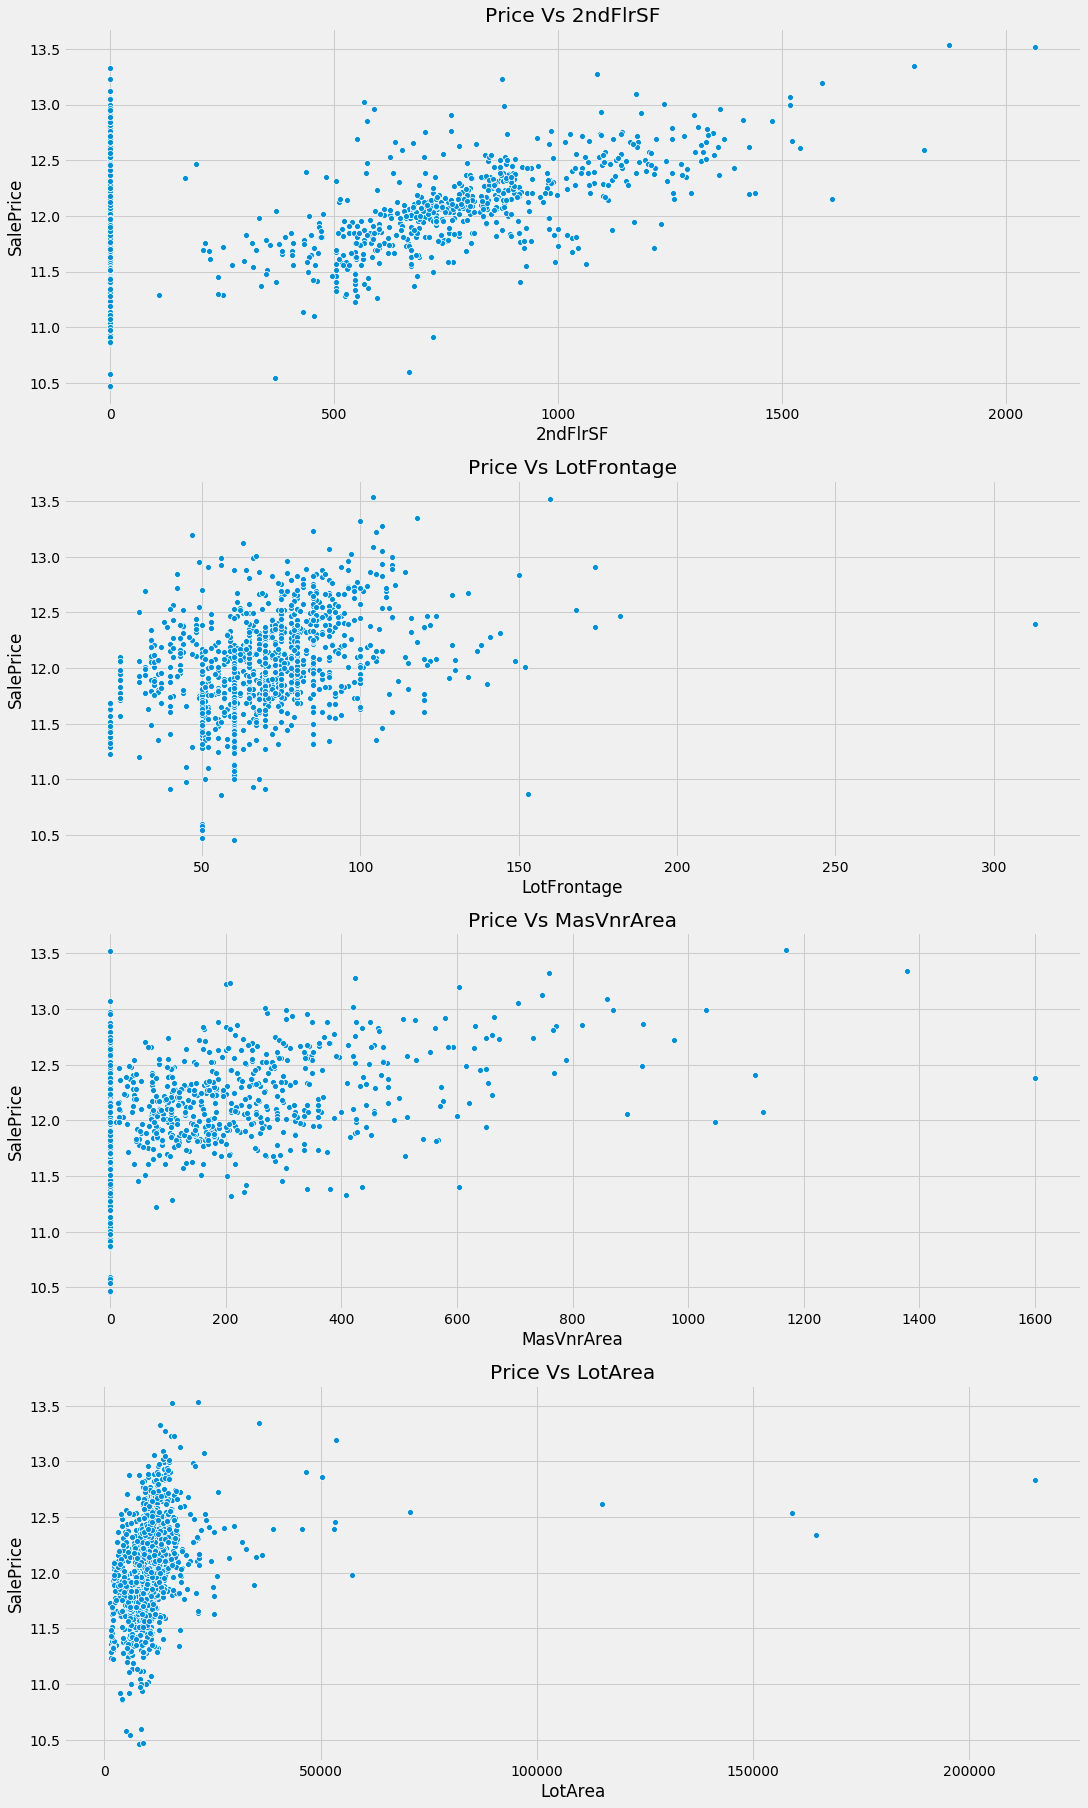

In [14]:
plotting_4_chart(train_df, 'SalePrice', '2ndFlrSF', 'LotFrontage', 'MasVnrArea', 'LotArea')

In [15]:
# Outliers in LotFrontage
train_df = train_df.drop(train_df[(train_df['LotFrontage'] > 300) & (train_df['SalePrice'] < 12.5)].index)
# Outliers in MasVnrArea
train_df = train_df.drop(train_df[(train_df['MasVnrArea'] > 1500) & (train_df['SalePrice'] < 12.5)].index)
# Outliers in LotArea
train_df = train_df.drop(train_df[(train_df['LotArea'] > 100000) & (train_df['SalePrice'] < 13)].index)

In [16]:
train_df.drop(columns=['Id'],axis=1, inplace=True)
test_df.drop(columns=['Id'],axis=1, inplace=True)

## Saving the target values in "y_train". 
y_train_df = train_df['SalePrice'].reset_index(drop=True)

# getting a copy of train
previous_train_df = train_df.copy()

In [17]:
# Convert some columns to categoical
train_df['MSSubClass'] = train_df['MSSubClass'].astype(str)
test_df['MSSubClass'] = test_df['MSSubClass'].astype(str)

train_df['YrSold'] = train_df['YrSold'].astype(str)
test_df['YrSold'] = test_df['YrSold'].astype(str)

train_df['MoSold'] = train_df['MoSold'].astype(str) 
test_df['MoSold'] = test_df['MoSold'].astype(str) 

# fill NaN and Missing
train_df['MSZoning'] = train_df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
test_df['MSZoning'] = test_df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

train_df['Functional'] = train_df['Functional'].fillna('Typ') 
train_df['Utilities'] = train_df['Utilities'].fillna('AllPub') 
train_df['Exterior1st'] = train_df['Exterior1st'].fillna(train_df['Exterior1st'].mode()[0]) 
train_df['Exterior2nd'] = train_df['Exterior2nd'].fillna(train_df['Exterior2nd'].mode()[0])
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean()) 
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean())
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mean()) 
train_df['KitchenQual'] = train_df['KitchenQual'].fillna("TA") 
train_df['SaleType'] = train_df['SaleType'].fillna(train_df['SaleType'].mode()[0])
train_df['Electrical'] = train_df['Electrical'].fillna("SBrkr") 

test_df['Functional'] = test_df['Functional'].fillna('Typ') 
test_df['Utilities'] = test_df['Utilities'].fillna('AllPub') 
test_df['Exterior1st'] = test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0]) 
test_df['Exterior2nd'] = test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean()) 
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean())
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mean()) 
test_df['KitchenQual'] = test_df['KitchenQual'].fillna("TA") 
test_df['SaleType'] = test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])
test_df['Electrical'] = test_df['Electrical'].fillna("SBrkr")

In [18]:
from scipy.stats import skew

numericalList = train_df.dtypes[train_df.dtypes != "object"].index
numericalList = numericalList.drop('SalePrice')
skewed_features = train_df[numericalList].apply(lambda x: skew(x)).sort_values(ascending=False)
print(skewed_features)

MiscVal           24.455957
PoolArea          15.882700
3SsnPorch         10.253854
LowQualFinSF       8.966866
KitchenAbvGr       4.464409
BsmtFinSF2         4.270779
ScreenPorch        4.128323
BsmtHalfBath       4.113098
LotArea            3.993781
EnclosedPorch      3.071765
MasVnrArea         2.496393
OpenPorchSF        2.334587
WoodDeckSF         1.520714
GrLivArea          1.023069
BsmtUnfSF          0.908976
1stFlrSF           0.894480
2ndFlrSF           0.808866
BsmtFinSF1         0.771944
LotFrontage        0.747325
OverallCond        0.691565
HalfBath           0.675846
TotRmsAbvGrd       0.665299
Fireplaces         0.636130
BsmtFullBath       0.575128
TotalBsmtSF        0.509967
BedroomAbvGr       0.213809
OverallQual        0.209135
FullBath           0.037677
GarageArea         0.020722
MonthsSinceMin     0.003687
GarageCars        -0.354328
YearRemodAdd      -0.502060
YearBuilt         -0.614196
GarageYrBlt       -0.669400
dtype: float64


In [19]:
## Fixing Skewed features using boxcox transformation. 

def fix_skew(df, numerical_list, threshold=0.5):
    """
    This function takes in a dataframe and return fixed skewed dataframe
    """
    ## Import necessary modules 
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax

    # Check the skew of all numerical features
    skewed_features = df[numerical_list].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skewed_features[abs(skewed_features) > threshold]
    skewed_features = high_skew.index

    for feat in skewed_features:
        df[feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))


In [20]:
#fix_skew(train_df, numericalList, 0.5)
#fix_skew(test_df, numericalList, 0.5)

In [21]:
from scipy.stats import kurtosis
kurt_features = train_df[numericalList].apply(lambda x: kurtosis(x)).sort_values(ascending=False)
print(kurt_features)

MiscVal           697.076485
PoolArea          255.245419
3SsnPorch         122.273745
LowQualFinSF       82.284497
LotArea            30.076440
KitchenAbvGr       21.258271
BsmtFinSF2         20.303729
ScreenPorch        18.475498
BsmtHalfBath       16.471624
EnclosedPorch      10.282596
OpenPorchSF         8.412248
MasVnrArea          8.197435
LotFrontage         3.496678
WoodDeckSF          2.910650
BedroomAbvGr        2.219074
GrLivArea           2.084964
TotalBsmtSF         1.800896
1stFlrSF            1.173580
OverallCond         1.103248
TotRmsAbvGrd        0.856069
BsmtUnfSF           0.435004
GarageArea          0.400556
GarageCars          0.190060
OverallQual         0.075920
BsmtFinSF1         -0.089055
GarageYrBlt        -0.271276
Fireplaces         -0.275762
YearBuilt          -0.445740
2ndFlrSF           -0.563304
FullBath           -0.868291
BsmtFullBath       -0.920353
HalfBath           -1.073859
MonthsSinceMin     -1.240891
YearRemodAdd       -1.272662
dtype: float64

In [22]:
objectList = [f for f in train_df.columns if train_df.dtypes[f] == 'object']

for col in objectList:
    train_df[col] = train_df[col].fillna('None')
    test_df[col] = test_df[col].fillna('None')

In [23]:
train_df = train_df.drop(['Utilities', 'Street', 'PoolQC'], axis=1)
test_df = test_df.drop(['Utilities', 'Street', 'PoolQC'], axis=1)

In [24]:
def add_summed_features(df):

    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df['TotalSF'] = df['TotalSF'].fillna(df['TotalSF'].mean()) 
    
    df['YrBltAndRemod'] = df['YearBuilt'] + df['YearRemodAdd']
    df['YrBltAndRemod'] = df['YrBltAndRemod'].fillna(df['YrBltAndRemod'].mean()) 
    
    df['Total_sqr_footage'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
    df['Total_sqr_footage'] = df['Total_sqr_footage'].fillna(df['Total_sqr_footage'].mean()) 
    
    df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
    df['Total_Bathrooms'] = df['Total_Bathrooms'].fillna(df['Total_Bathrooms'].mean()) 
    
    df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])
    df['Total_porch_sf'] = df['Total_porch_sf'].fillna(df['Total_porch_sf'].mean()) 

def area_features(df):
    df['LotMinusTotalSF'] = df['TotalSF'] - df['LotArea']
    df['LotMinusTotalSF'] = df['LotMinusTotalSF'].fillna(df['LotMinusTotalSF'].mean())
    df['LotDivTotalSF'] = df['LotArea'] / df['TotalSF']
    df['LotDivTotalSF'] = df['LotDivTotalSF'].fillna(df['LotDivTotalSF'].mean())

def has_doesnot_have(df, features):
    for feature in features:
        df['has'+feature] = df[feature].apply(lambda x: 1 if x > 0 else 0)

In [25]:
add_summed_features(train_df)
area_features(train_df)
has_doesnot_have(train_df, ['PoolArea', '2ndFlrSF', 'GarageArea', 'TotalBsmtSF', 'Fireplaces'])

add_summed_features(test_df) 
area_features(test_df)
has_doesnot_have(test_df, ['PoolArea', '2ndFlrSF', 'GarageArea', 'TotalBsmtSF', 'Fireplaces'])

In [26]:
def numerical_cleanup(df, column_names):
    for col in column_names:
        if(df[col].isnull().values.any()):
            df[col] = df[col].fillna(df[col].mean())

In [27]:
numerical_cleanup(train_df, numericalList)
numerical_cleanup(test_df, numericalList)

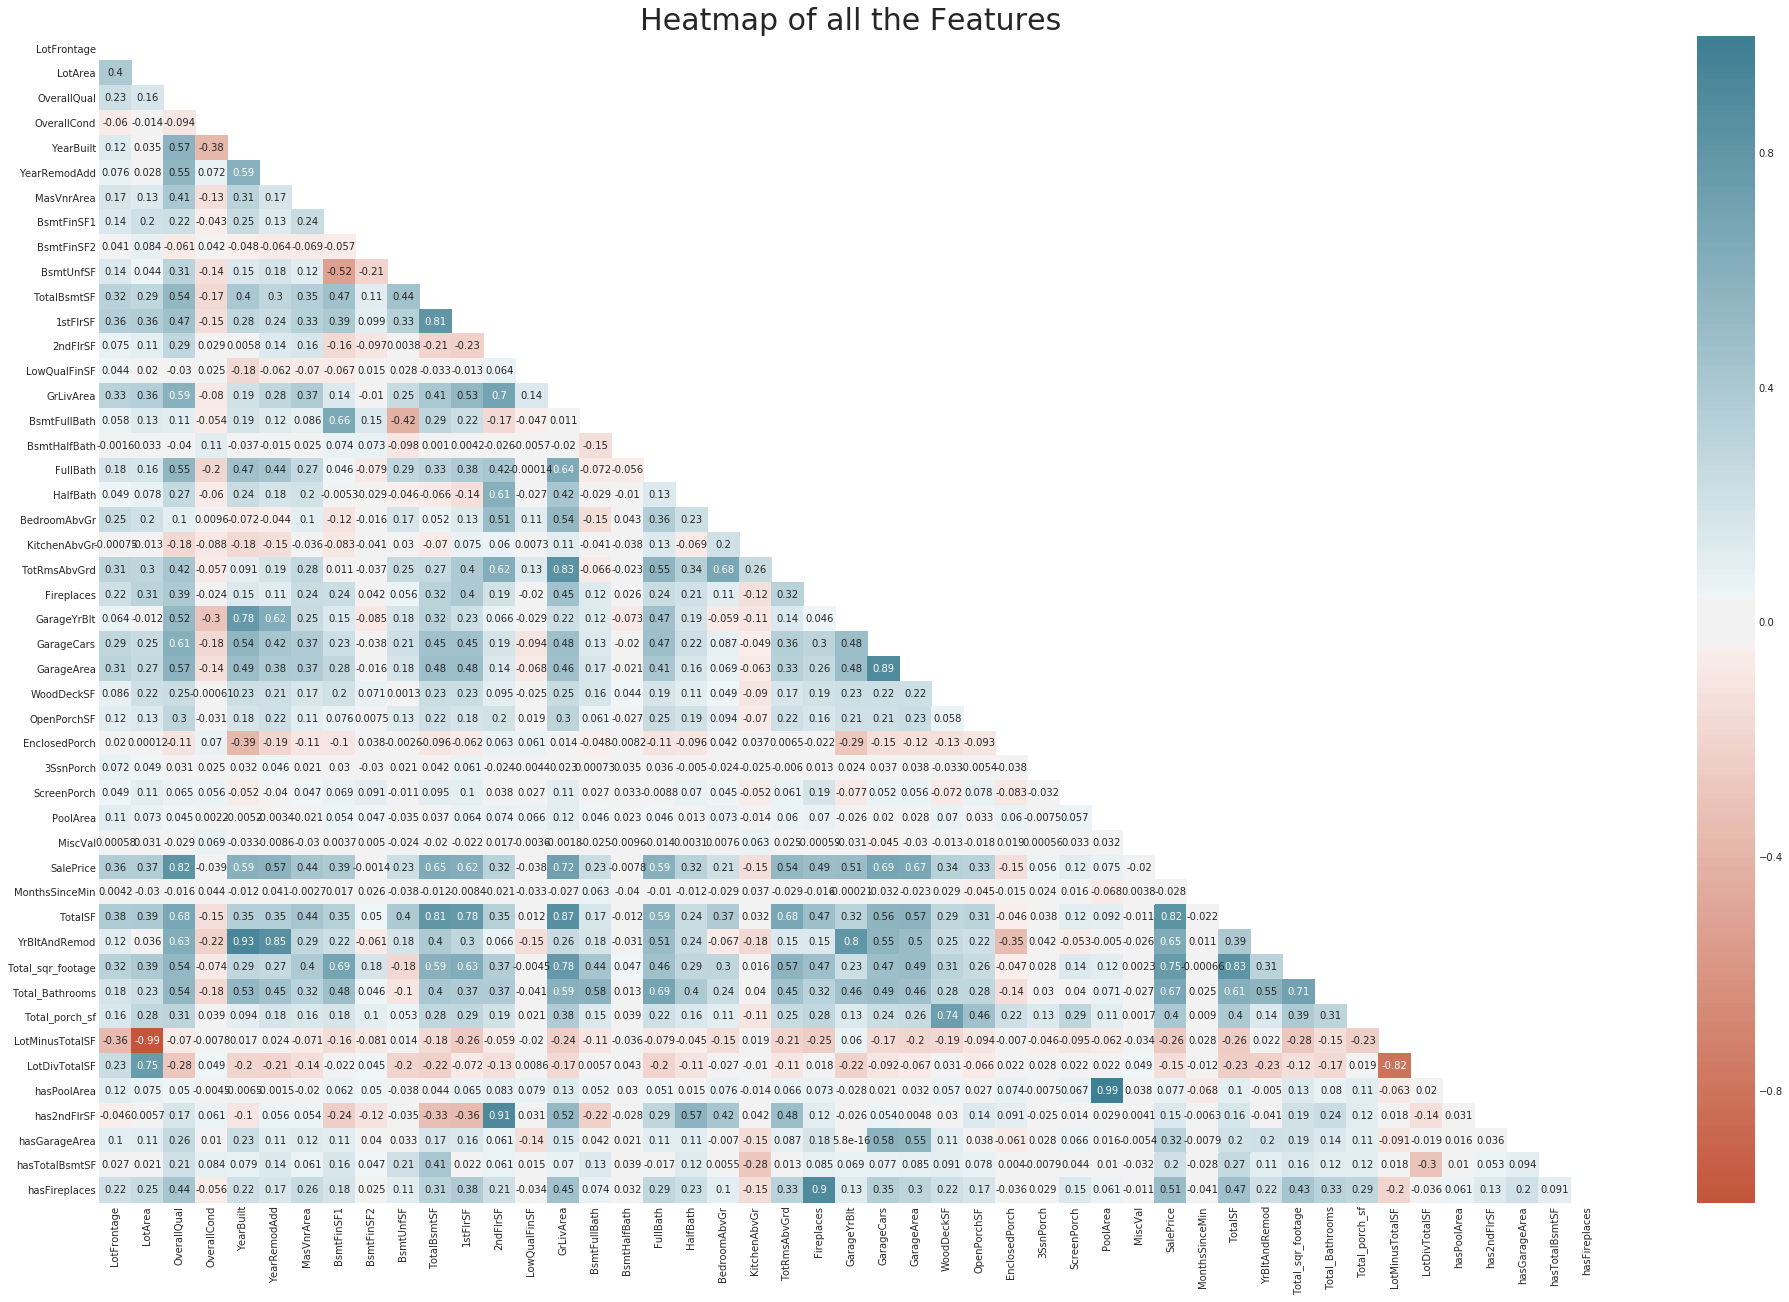

In [28]:
## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(train_df.corr(), cmap=sns.diverging_palette(20, 220, n=200), mask = mask, annot=True, center = 0, );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

In [29]:
train_df.drop(columns=['SalePrice'],axis=1, inplace=True)
trainLen = y_train_df.shape[0]

combined_df = pd.concat([train_df, test_df], ignore_index=True)
combined_df = pd.get_dummies(combined_df).reset_index(drop=True)

In [30]:
scaler = StandardScaler()
scaler.fit_transform(combined_df)

X_train = combined_df.iloc[:trainLen, :]
X_test = combined_df.iloc[trainLen:, :]

del combined_df

In [31]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train_df, test_size = .2, random_state = 0)

In [32]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape, X_test.shape 

((1159, 336), (290, 336), (1159,), (290,), (1459, 336))

In [61]:
def rsme(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

def grid_search_best_parameters(estimator, param_grid, X, y, cv=5, n_jobs=-1, verbose=2):
    model = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv, n_jobs=n_jobs, verbose=verbose)
    model.fit(X, y)
    return model.best_params_

search_for_parameters = False

In [59]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print("RSME Score : ", rsme(y_valid, lr.predict(X_valid)))

RSME Score :  171.7587772396015


In [62]:
if search_for_parameters:
    param_grid_ridge = {
        'alpha' : np.linspace(12.5, 13.5, num=21),
        'max_iter': [15, 25],
        'tol': np.linspace(0.5e-3, 2.5e-3, num=21)
    }

    ridgeBest = grid_search_best_parameters(Ridge(), param_grid_ridge, X_train, y_train, cv=5, n_jobs=-1, verbose=False)
    print("Best Parameters : ", ridgeBest)
    
else:
    ridgeBest = {'alpha': 12.95, 'max_iter': 15, 'tol': 0.0005}

    
ridge = Ridge(alpha=ridgeBest['alpha'], max_iter=ridgeBest['max_iter'], tol=ridgeBest['tol'])
ridge.fit(X_train, y_train)

rsme_dict = {'ridge' : rsme(y_valid, ridge.predict(X_valid))}
print("RSME Score : ", rsme_dict['ridge'])

RSME Score :  0.11334720648195261


In [63]:
gbr = GradientBoostingRegressor(max_features='sqrt', 
                                min_samples_leaf=15, 
                                min_samples_split=10, 
                                loss='huber', 
                                random_state=42)

if search_for_parameters:
    param_grid_gbr = {
        'max_depth' : [2, 3, 4],
        'n_estimators': [4000, 5000, 6000],
        'learning_rate': [0.025, 0.035]
    }

    gbrBest = grid_search_best_parameters(gbr, param_grid_gbr, X_train, y_train, cv=5, n_jobs=-1, verbose=False)
    print("Best Parameters : ", gbrBest)

else:
    gbrBest = {'learning_rate': 0.025, 'max_depth': 2, 'n_estimators': 6000}

gbr = GradientBoostingRegressor(max_depth=gbrBest['max_depth'],
                                n_estimators=gbrBest['n_estimators'],
                                learning_rate=gbrBest['learning_rate'],
                                max_features='sqrt', 
                                min_samples_leaf=15, 
                                min_samples_split=10, 
                                loss='huber', 
                                random_state=42)

gbr.fit(X_train, y_train)

rsme_dict.update({'gbr' : rsme(y_valid, gbr.predict(X_valid))})
print("RSME Score : ", rsme_dict['gbr'])

RSME Score :  0.11450154703718371


In [64]:
lightgbm = LGBMRegressor(objective='regression', 
                         max_bin=200, 
                         bagging_seed=7,
                         feature_fraction=0.2,
                         feature_fraction_seed=7,
                         verbose=-1)

if search_for_parameters:
    param_grid_lgbm = {
        'num_leaves' : [6, 7],
        'n_estimators': [4000, 5000, 6000],
        'learning_rate': [0.005, 0.01, 0.015],
        'bagging_freq' : [6, 7],
        'bagging_fraction' : [0.75, 0.8, 0.85]
    }
    
    lgbmBest = grid_search_best_parameters(lightgbm, param_grid_lgbm, X_train, y_train, cv=5, n_jobs=-1, verbose=False)
    print("Best Parameters : ", lgbmBest)
    
else:
    lgbmBest = {'bagging_fraction': 0.8, 'bagging_freq': 6, 'learning_rate': 0.01, 'n_estimators': 5000, 'num_leaves': 6}
    
lightgbm = LGBMRegressor(objective='regression', 
                         num_leaves=lgbmBest['num_leaves'],
                         n_estimators=lgbmBest['n_estimators'],
                         learning_rate=lgbmBest['learning_rate'],
                         bagging_freq=lgbmBest['bagging_freq'],
                         bagging_fraction=lgbmBest['bagging_fraction'],
                         max_bin=200, 
                         bagging_seed=7,
                         feature_fraction=0.2,
                         feature_fraction_seed=7,
                         verbose=-1)

lightgbm.fit(X_train, y_train)

rsme_dict.update({'lightgbm' : rsme(y_valid, lightgbm.predict(X_valid))})
print("RSME Score : ", rsme_dict['lightgbm'])

RSME Score :  0.11432935214423605


In [74]:
xgboost = XGBRegressor(min_child_weight=0,
                       gamma=0, 
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1, 
                       seed=27,
                       reg_alpha=0.00006)

if search_for_parameters:
    param_grid_xgb = {
        'max_depth' : [2, 4, 6],
        'n_estimators': [2000, 3000, 4000],
        'learning_rate': [0.01, 0.03, 0.05]
    }

    xgbBest = grid_search_best_parameters(xgboost, param_grid_xgb, X_train, y_train, cv=5, n_jobs=-1, verbose=False)
    print("Best Parameters : ", xgbBest)
else:
    xgbBest = {'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 5000}
    
xgboost = XGBRegressor(max_depth=xgbBest['max_depth'],
                       n_estimators=xgbBest['n_estimators'],
                       learning_rate=xgbBest['learning_rate'],
                       min_child_weight=0,
                       gamma=0, 
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1, 
                       seed=27,
                       reg_alpha=0.00006)

xgboost.fit(X_train, y_train)

rsme_dict.update({'xgboost' : rsme(y_valid, xgboost.predict(X_valid))})
print("RSME Score : ", rsme_dict['xgboost'])

RSME Score :  0.11313520863835694


In [66]:
xgboost_meta = XGBRegressor(learning_rate=0.05, 
                            n_estimators=4000,
                            max_depth=2, 
                            min_child_weight=0,
                            gamma=0, 
                            subsample=0.5,
                            colsample_bytree=0.5,
                            objective='reg:squarederror',
                            nthread=-1,
                            scale_pos_weight=1, 
                            seed=43,
                            reg_alpha=0.00006)

In [67]:
stackReg = StackingCVRegressor(regressors=(ridge, gbr, xgboost, lightgbm), meta_regressor=xgboost_meta, use_features_in_secondary=True)
stackReg.fit(X_train, y_train)

rsme_dict.update({'stackReg' : rsme(y_valid, stackReg.predict(np.array(X_valid)))})
print("RSME Score : ", rsme_dict['stackReg'])

RSME Score :  0.11559124292948973


In [80]:
X_valid_pred = 0.2*ridge.predict(X_valid) + 0.15*gbr.predict(X_valid) + 0.25*xgboost.predict(X_valid) + 0.15*lightgbm.predict(X_valid) + 0.25*stackReg.predict(np.array(X_valid))
print("RSME Score : ", rsme(y_valid, X_valid_pred))

RSME Score :  0.1092996632399778


In [81]:
X_test_pred = 0.2*ridge.predict(X_test) + 0.15*gbr.predict(X_test) + 0.25*xgboost.predict(X_test) + 0.15*lightgbm.predict(X_test) + 0.25*stackReg.predict(np.array(X_test))

In [70]:
submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(X_test_pred))

In [71]:
submission.head() 

,Id,SalePrice
0,1461,122809.0
1,1462,160674.0
2,1463,184939.0
3,1464,198295.0
4,1465,188566.0


In [ ]:
submission.to_csv("submission.csv", index=False)